<a href="https://colab.research.google.com/github/Damian25-lamn/aprendizaje-automatico-252601/blob/main/Minda_Anthony_4_1_Medidas_de_Similitud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [3]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [4]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [5]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [6]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

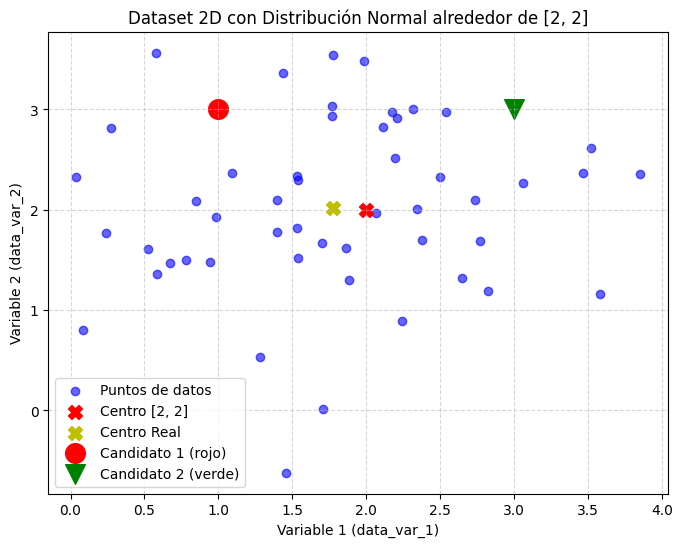

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


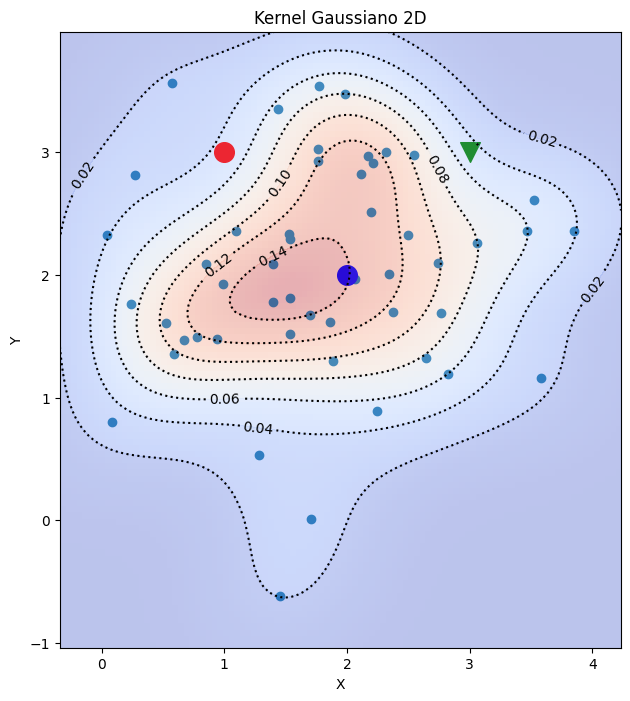

In [7]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

In [8]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal([2,1], 50, ds_center)

dx2, dy2 = cargar_datasetRelacionCuadratica([1, 0, 0], 50, (-5, 5))

In [9]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [11]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov
print(f'Covarianza dataset con distribución normal:\n{np.cov(dx, dy)}\n')

print(f'Covarianza dataset con relación lineal :\n{np.cov(dxr, dyr)}\n')

print(f'Covarianza dataset con relación lineal Grande:\n{np.cov(dxGrande, dyGrande)}\n')

print(f'Covarianza dataset con relación cuadratica:\n{np.cov(dx2, dy2)}\n')

Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]

Covarianza dataset con relación lineal :
[[3.48694958 3.66665937]
 [3.66665937 4.61081334]]

Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]

Covarianza dataset con relación cuadratica:
[[ 8.34535038 -2.48409573]
 [-2.48409573 60.72673368]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El Dataset con relacion lineal Grande tiene la mayor dependencia lineal, como lo indica su valor de covarianza de 375.65(entre variables x e y), lo que significa mayor magnitud que los otros datasets. Esto sugiere una fuerte relacion lineal entre sus variables

¿Cual es el problema que tiene la covarianza?

El principal problema de la covarianza es que su magnitud depende de la escala de las variables. Esto significa que un valor de convarianza grande no necesariamente indica una relacion lineal mas fuerte que un valor de covarianza mas pequeño; podria simplemente ser que las variables en el primer caso tienen valores mas grande.

In [13]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef

p_corr_normal = np.corrcoef(dx, dy)
print(f'Coeficiente de correlación de Pearson (distribución normal):\n{p_corr_normal}\n')

p_corr_linear = np.corrcoef(dxr, dyr)
print(f'Coeficiente de correlación de Pearson (relación lineal):\n{p_corr_linear}\n')

p_corr_large_linear = np.corrcoef(dxGrande, dyGrande)
print(f'Coeficiente de correlación de Pearson (relación lineal Grande):\n{p_corr_large_linear}\n')

Coeficiente de correlación de Pearson (distribución normal):
[[1.         0.11007179]
 [0.11007179 1.        ]]

Coeficiente de correlación de Pearson (relación lineal):
[[1.         0.91444789]
 [0.91444789 1.        ]]

Coeficiente de correlación de Pearson (relación lineal Grande):
[[1.         0.88736636]
 [0.88736636 1.        ]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El dataset con relacion lineal (0.914) tiene la mayor dependencia lineal entre sus dos variables, ya que su coeficiente de correlacion de Pearson es el mas cercano a 1. Aunque el dataset lineal Grande tambien tiene una fuerte correlacion (0.887), el lineal pequeño es ligeramnete superior en este caso.

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

El coeficiente de relacion de Pearson es mucho mas facil de interpretar para identificar la dependencia lineal entre dos variables que la covarianza. Esto se debe a que el coeficiente de Pearson esta estandarizado, lo que significa que toma valores entre -1, 1, independiente de la escala de variable. En cambio,  la covarianza, al depender de la escala, es difícil de comparar directamente entre diferentes conjuntos de datos o variables con distintas unidades.

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [19]:
import numpy as np
from scipy.spatial.distance import mahalanobis, cosine, jaccard

# TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

def distancia_euclidiana(x, y, verbose=False):
    dist = np.linalg.norm(x - y, ord=2)
    if verbose:
        print(f'Distancia Euclidiana entre {x} y {y} = {dist}')
    return dist

def distancia_manhattan(x, y, verbose=False):
    dist = np.linalg.norm(x - y, ord=1)
    if verbose:
        print(f'Distancia Manhattan entre {x} y {y} = {dist}')
    return dist

def distancia_chebyshev(x, y, verbose=False):
    dist = np.linalg.norm(x - y, ord=np.inf)
    if verbose:
        print(f'Distancia Chebyshev entre {x} y {y} = {dist}')
    return dist

def similitud_coseno(x, y, verbose=False):
    sim = 1 - cosine(x, y)  # cosine devuelve distancia
    if verbose:
        print(f'Similitud de Coseno entre {x} y {y} = {sim}')
    return sim


def distancia_mahalanobis(x, y, C, verbose=False):
    if np.linalg.det(C) == 0:
        epsilon = 1e-6
        C = C + epsilon * np.eye(C.shape[0])

    C_inv = np.linalg.inv(C)
    dist = mahalanobis(x, y, C_inv)

    if verbose:
        print(f'Distancia Mahalanobis entre {x} y {y} = {dist}')
    return dist

def distancia_jaccard(x, y, verbose=False):
    dist = jaccard(x, y)
    if verbose:
        print(f'Distancia Jaccard entre {x} y {y} = {dist}')
    return dist


In [23]:
# Ejecutar funciones
print("🔍 calculando las distancias de los puntos candidatos al centro")

# --- Dataset con Distribución Normal (dx, dy) ---
print('\n' + '='*50)
print('Distancias para el Dataset con Distribución Normal:')
ds_center_normal = np.array([np.mean(dx), np.mean(dy)])
print(f'Centro del dataset normal: {ds_center_normal}')
print(f'Punto candidato 1 (c1): {c1}')
print(f'Punto candidato 2 (c2): {c2}')

print('\n  Euclidiana:')
dist_euc1_normal = distancia_euclidiana(c1, ds_center_normal)
dist_euc2_normal = distancia_euclidiana(c2, ds_center_normal)
print(f'Distancia Euclidiana c1: {dist_euc1_normal:.2f}')
print(f'Distancia Euclidiana c2: {dist_euc2_normal:.2f}')

print('\n  Manhattan:')
dist_man1_normal = distancia_manhattan(c1, ds_center_normal)
dist_man2_normal = distancia_manhattan(c2, ds_center_normal)
print(f'Distancia Manhattan c1: {dist_man1_normal:.2f}')
print(f'Distancia Manhattan c2: {dist_man2_normal:.2f}')

print('\n  Chebyshev:')
dist_cheb1_normal = distancia_chebyshev(c1, ds_center_normal)
dist_cheb2_normal = distancia_chebyshev(c2, ds_center_normal)
print(f'Distancia Chebyshev c1: {dist_cheb1_normal:.2f}')
print(f'Distancia Chebyshev c2: {dist_cheb2_normal:.2f}')

print('\n  Similitud de Coseno:')
sim_cos1_normal = similitud_coseno(c1, ds_center_normal)
sim_cos2_normal = similitud_coseno(c2, ds_center_normal)
print(f'Similitud de Coseno c1: {sim_cos1_normal:.2f}')
print(f'Similitud de Coseno c2: {sim_cos2_normal:.2f}')

print('\n  Mahalanobis:')
mC_normal = np.cov(np.vstack([dx, dy]))
dist_mah1_normal = distancia_mahalanobis(c1, ds_center_normal, mC_normal)
dist_mah2_normal = distancia_mahalanobis(c2, ds_center_normal, mC_normal)
print(f'Distancia Mahalanobis c1: {dist_mah1_normal:.2f}')
print(f'Distancia Mahalanobis c2: {dist_mah2_normal:.2f}')

print('\n  Jaccard:')
print('Advertencia: La distancia de Jaccard se aplica aquí a vectores continuos. Su interpretación debe hacerse con precaución.')
dist_jac1_normal = distancia_jaccard(c1, ds_center_normal)
dist_jac2_normal = distancia_jaccard(c2, ds_center_normal)
print(f'Distancia Jaccard c1: {dist_jac1_normal:.2f}')
print(f'Distancia Jaccard c2: {dist_jac2_normal:.2f}')


# --- Dataset con Relación Lineal (dxr, dyr) ---
print('\n' + '='*50)
print('Distancias para el Dataset con Relación Lineal:')
ds_center_linear = np.array([np.mean(dxr), np.mean(dyr)])
print(f'Centro del dataset lineal: {ds_center_linear}')
print(f'Punto candidato 1 (c1): {c1}')
print(f'Punto candidato 2 (c2): {c2}')

print('\n  Euclidiana:')
dist_euc1_linear = distancia_euclidiana(c1, ds_center_linear)
dist_euc2_linear = distancia_euclidiana(c2, ds_center_linear)
print(f'Distancia Euclidiana c1: {dist_euc1_linear:.2f}')
print(f'Distancia Euclidiana c2: {dist_euc2_linear:.2f}')

print('\n  Manhattan:')
dist_man1_linear = distancia_manhattan(c1, ds_center_linear)
dist_man2_linear = distancia_manhattan(c2, ds_center_linear)
print(f'Distancia Manhattan c1: {dist_man1_linear:.2f}')
print(f'Distancia Manhattan c2: {dist_man2_linear:.2f}')

print('\n  Chebyshev:')
dist_cheb1_linear = distancia_chebyshev(c1, ds_center_linear)
dist_cheb2_linear = distancia_chebyshev(c2, ds_center_linear)
print(f'Distancia Chebyshev c1: {dist_cheb1_linear:.2f}')
print(f'Distancia Chebyshev c2: {dist_cheb2_linear:.2f}')

print('\n  Similitud de Coseno:')
sim_cos1_linear = similitud_coseno(c1, ds_center_linear)
sim_cos2_linear = similitud_coseno(c2, ds_center_linear)
print(f'Similitud de Coseno c1: {sim_cos1_linear:.2f}')
print(f'Similitud de Coseno c2: {sim_cos2_linear:.2f}')

print('\n  Mahalanobis:')
mC_linear = np.cov(np.vstack([dxr, dyr]))
dist_mah1_linear = distancia_mahalanobis(c1, ds_center_linear, mC_linear)
dist_mah2_linear = distancia_mahalanobis(c2, ds_center_linear, mC_linear)
print(f'Distancia Mahalanobis c1: {dist_mah1_linear:.2f}')
print(f'Distancia Mahalanobis c2: {dist_mah2_linear:.2f}')

print('\n  Jaccard:')
print('Advertencia: La distancia de Jaccard se aplica aquí a vectores continuos. Su interpretación debe hacerse con precaución.')
dist_jac1_linear = distancia_jaccard(c1, ds_center_linear)
dist_jac2_linear = distancia_jaccard(c2, ds_center_linear)
print(f'Distancia Jaccard c1: {dist_jac1_linear:.2f}')
print(f'Distancia Jaccard c2: {dist_jac2_linear:.2f}')


# --- Dataset con Relación Cuadrática (dx2, dy2) ---
print('\n' + '='*50)
print('Distancias para el Dataset con Relación Cuadrática:')
ds_center_quadratic = np.array([np.mean(dx2), np.mean(dy2)])
print(f'Centro del dataset cuadrático: {ds_center_quadratic}')
print(f'Punto candidato 1 (c1): {c1}')
print(f'Punto candidato 2 (c2): {c2}')

print('\n  Euclidiana:')
dist_euc1_quadratic = distancia_euclidiana(c1, ds_center_quadratic)
dist_euc2_quadratic = distancia_euclidiana(c2, ds_center_quadratic)
print(f'Distancia Euclidiana c1: {dist_euc1_quadratic:.2f}')
print(f'Distancia Euclidiana c2: {dist_euc2_quadratic:.2f}')

print('\n  Manhattan:')
dist_man1_quadratic = distancia_manhattan(c1, ds_center_quadratic)
dist_man2_quadratic = distancia_manhattan(c2, ds_center_quadratic)
print(f'Distancia Manhattan c1: {dist_man1_quadratic:.2f}')
print(f'Distancia Manhattan c2: {dist_man2_quadratic:.2f}')

print('\n  Chebyshev:')
dist_cheb1_quadratic = distancia_chebyshev(c1, ds_center_quadratic)
dist_cheb2_quadratic = distancia_chebyshev(c2, ds_center_quadratic)
print(f'Distancia Chebyshev c1: {dist_cheb1_quadratic:.2f}')
print(f'Distancia Chebyshev c2: {dist_cheb2_quadratic:.2f}')

print('\n  Similitud de Coseno:')
sim_cos1_quadratic = similitud_coseno(c1, ds_center_quadratic)
sim_cos2_quadratic = similitud_coseno(c2, ds_center_quadratic)
print(f'Similitud de Coseno c1: {sim_cos1_quadratic:.2f}')
print(f'Similitud de Coseno c2: {sim_cos2_quadratic:.2f}')

print('\n  Mahalanobis:')
mC_quadratic = np.cov(np.vstack([dx2, dy2]))
dist_mah1_quadratic = distancia_mahalanobis(c1, ds_center_quadratic, mC_quadratic)
dist_mah2_quadratic = distancia_mahalanobis(c2, ds_center_quadratic, mC_quadratic)
print(f'Distancia Mahalanobis c1: {dist_mah1_quadratic:.2f}')
print(f'Distancia Mahalanobis c2: {dist_mah2_quadratic:.2f}')

print('\n  Jaccard:')
print('Advertencia: La distancia de Jaccard se aplica aquí a vectores continuos. Su interpretación debe hacerse con precaución.')
dist_jac1_quadratic = distancia_jaccard(c1, ds_center_quadratic)
dist_jac2_quadratic = distancia_jaccard(c2, ds_center_quadratic)
print(f'Distancia Jaccard c1: {dist_jac1_quadratic:.2f}')
print(f'Distancia Jaccard c2: {dist_jac2_quadratic:.2f}')


# --- Dataset con Relación Lineal Grande (dxGrande, dyGrande) ---
print('\n' + '='*50)
print('Distancias para el Dataset con Relación Lineal Grande:')
ds_center_large_linear = np.array([np.mean(dxGrande), np.mean(dyGrande)])
print(f'Centro del dataset lineal grande: {ds_center_large_linear}')
print(f'Punto candidato 1 (c1): {c1}')
print(f'Punto candidato 2 (c2): {c2}')

print('\n  Euclidiana:')
dist_euc1_large_linear = distancia_euclidiana(c1, ds_center_large_linear)
dist_euc2_large_linear = distancia_euclidiana(c2, ds_center_large_linear)
print(f'Distancia Euclidiana c1: {dist_euc1_large_linear:.2f}')
print(f'Distancia Euclidiana c2: {dist_euc2_large_linear:.2f}')

print('\n  Manhattan:')
dist_man1_large_linear = distancia_manhattan(c1, ds_center_large_linear)
dist_man2_large_linear = distancia_manhattan(c2, ds_center_large_linear)
print(f'Distancia Manhattan c1: {dist_man1_large_linear:.2f}')
print(f'Distancia Manhattan c2: {dist_man2_large_linear:.2f}')

print('\n  Chebyshev:')
dist_cheb1_large_linear = distancia_chebyshev(c1, ds_center_large_linear)
dist_cheb2_large_linear = distancia_chebyshev(c2, ds_center_large_linear)
print(f'Distancia Chebyshev c1: {dist_cheb1_large_linear:.2f}')
print(f'Distancia Chebyshev c2: {dist_cheb2_large_linear:.2f}')

print('\n  Similitud de Coseno:')
sim_cos1_large_linear = similitud_coseno(c1, ds_center_large_linear)
sim_cos2_large_linear = similitud_coseno(c2, ds_center_large_linear)
print(f'Similitud de Coseno c1: {sim_cos1_large_linear:.2f}')
print(f'Similitud de Coseno c2: {sim_cos2_large_linear:.2f}')

print('\n  Mahalanobis:')
mC_large_linear = np.cov(np.vstack([dxGrande, dyGrande]))
dist_mah1_large_linear = distancia_mahalanobis(c1, ds_center_large_linear, mC_large_linear)
dist_mah2_large_linear = distancia_mahalanobis(c2, ds_center_large_linear, mC_large_linear)
print(f'Distancia Mahalanobis c1: {dist_mah1_large_linear:.2f}')
print(f'Distancia Mahalanobis c2: {dist_mah2_large_linear:.2f}')

print('\n  Jaccard:')
print('Advertencia: La distancia de Jaccard se aplica aquí a vectores continuos. Su interpretación debe hacerse con precaución.')
dist_jac1_large_linear = distancia_jaccard(c1, ds_center_large_linear)
dist_jac2_large_linear = distancia_jaccard(c2, ds_center_large_linear)
print(f'Distancia Jaccard c1: {dist_jac1_large_linear:.2f}')
print(f'Distancia Jaccard c2: {dist_jac2_large_linear:.2f}')

🔍 calculando las distancias de los puntos candidatos al centro

Distancias para el Dataset con Distribución Normal:
Centro del dataset normal: [1.77452609 2.01778087]
Punto candidato 1 (c1): [1 3]
Punto candidato 2 (c2): [3 3]

  Euclidiana:
Distancia Euclidiana c1: 1.25
Distancia Euclidiana c2: 1.57

  Manhattan:
Distancia Manhattan c1: 1.76
Distancia Manhattan c2: 2.21

  Chebyshev:
Distancia Chebyshev c1: 0.98
Distancia Chebyshev c2: 1.23

  Similitud de Coseno:
Similitud de Coseno c1: 0.92
Similitud de Coseno c2: 1.00

  Mahalanobis:
Distancia Mahalanobis c1: 1.48
Distancia Mahalanobis c2: 1.64

  Jaccard:
Advertencia: La distancia de Jaccard se aplica aquí a vectores continuos. Su interpretación debe hacerse con precaución.
Distancia Jaccard c1: 0.00
Distancia Jaccard c2: 0.00

Distancias para el Dataset con Relación Lineal:
Centro del dataset lineal: [1.54905219 1.56683306]
Punto candidato 1 (c1): [1 3]
Punto candidato 2 (c2): [3 3]

  Euclidiana:
Distancia Euclidiana c1: 1.53
Di

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?

Las medidas de disimilitud que calculan la distancia entre un punto y otro punto (es decir, entre dos vectores individuales) son:

 -> Distancia Euclidiana (L2)

 -> Distancia Manhattan (L1)

 -> Distancia Chebyshev (L∞)

 -> Similitud de Coseno (calcula la similitud de orientación entre dos vectores)

 -> Distancia de Jaccard

¿Qué medidas de disimilitud son de un punto a una distribución?

La medida de disimilitud que considera la estructura o forma de una distribución de datos (más allá de un solo punto) es:

 -> Distancia de Mahalanobis

¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

Sí, absolutamente. La principal característica y ventaja de la Distancia de Mahalanobis es que sí es capaz de tener en cuenta la distribución real de los datos. Lo hace incorporando la matriz de covarianza de la distribución de los datos.

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [25]:
import itertools as it
#  TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for i, j in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            # Asumimos que la distancia es mahalanobis si mC es proporcionado
            mD[i, j] = distancia(X[i], X[j], mC)
        else:
            mD[i, j] = distancia(X[i], X[j])
    return mD

In [27]:
# --- Dataset con Distribución Normal ---
print('Calculando matrices para el Dataset con Distribución Normal:')
X_normal = np.vstack([dx, dy]).T
mC_normal = np.cov(X_normal.T)
Ma_euclidea_normal = matriz_distancias(X_normal, distancia_euclidiana)
Ma_mahalanobis_normal = matriz_distancias(X_normal, distancia_mahalanobis, mC_normal)
print('Matriz Euclidiana (Normal):\n', Ma_euclidea_normal)
print('Matriz Mahalanobis (Normal):\n', Ma_mahalanobis_normal)

# --- Dataset con Relación Lineal ---
print('\nCalculando matrices para el Dataset con Relación Lineal:')
X_linear = np.vstack([dxr, dyr]).T
mC_linear = np.cov(X_linear.T)
Ma_euclidea_linear = matriz_distancias(X_linear, distancia_euclidiana)
Ma_mahalanobis_linear = matriz_distancias(X_linear, distancia_mahalanobis, mC_linear)
print('Matriz Euclidiana (Lineal):\n', Ma_euclidea_linear)
print('Matriz Mahalanobis (Lineal):\n', Ma_mahalanobis_linear)

# --- Dataset con Relación Cuadrática ---
print('\nCalculando matrices para el Dataset con Relación Cuadrática:')
X_quadratic = np.vstack([dx2, dy2]).T
mC_quadratic = np.cov(X_quadratic.T)
Ma_euclidea_quadratic = matriz_distancias(X_quadratic, distancia_euclidiana)
Ma_mahalanobis_quadratic = matriz_distancias(X_quadratic, distancia_mahalanobis, mC_quadratic)
print('Matriz Euclidiana (Cuadrática):\n', Ma_euclidea_quadratic)
print('Matriz Mahalanobis (Cuadrática):\n', Ma_mahalanobis_quadratic)

# --- Dataset con Relación Lineal Grande ---
print('\nCalculando matrices para el Dataset con Relación Lineal Grande:')
X_large_linear = np.vstack([dxGrande, dyGrande]).T
mC_large_linear = np.cov(X_large_linear.T)
Ma_euclidea_large_linear = matriz_distancias(X_large_linear, distancia_euclidiana)
Ma_mahalanobis_large_linear = matriz_distancias(X_large_linear, distancia_mahalanobis, mC_large_linear)
print('Matriz Euclidiana (Lineal Grande):\n', Ma_euclidea_large_linear)
print('Matriz Mahalanobis (Lineal Grande):\n', Ma_mahalanobis_large_linear)

Calculando matrices para el Dataset con Distribución Normal:
Matriz Euclidiana (Normal):
 [[0.         0.95190042 1.01232713 ... 0.56394133 0.35380861 2.32778928]
 [0.95190042 0.         0.83838672 ... 1.35883873 0.62005124 1.63173079]
 [1.01232713 0.83838672 0.         ... 1.02344385 0.746747   2.45097388]
 ...
 [0.56394133 1.35883873 1.02344385 ... 0.         0.75801984 2.86338563]
 [0.35380861 0.62005124 0.746747   ... 0.75801984 0.         2.12025144]
 [2.32778928 1.63173079 2.45097388 ... 2.86338563 2.12025144 0.        ]]
Matriz Mahalanobis (Normal):
 [[0.         1.00559597 1.18091974 ... 0.6161063  0.38550157 2.44915074]
 [1.00559597 0.         0.94482618 ... 1.41467013 0.64801705 1.77825694]
 [1.18091974 0.94482618 0.         ... 1.12019729 0.88314767 2.70160112]
 ...
 [0.6161063  1.41467013 1.12019729 ... 0.         0.79249355 3.02971048]
 [0.38550157 0.64801705 0.88314767 ... 0.79249355 0.         2.25647239]
 [2.44915074 1.77825694 2.70160112 ... 3.02971048 2.25647239 0.   

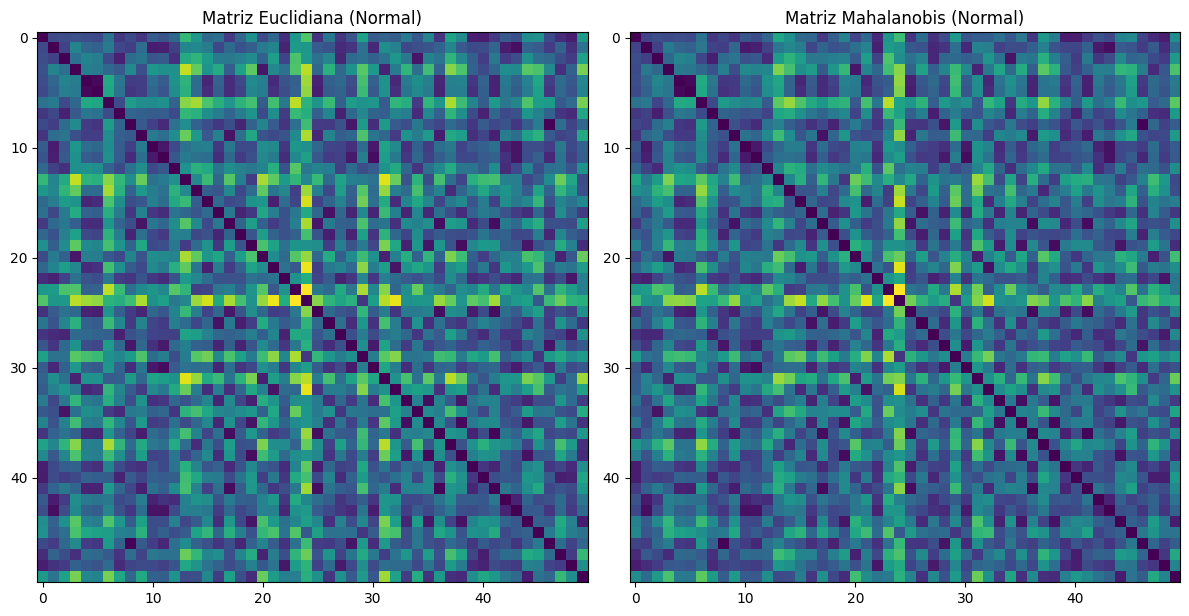

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Ma_euclidea_normal, cmap='viridis')
ax[0].set_title('Matriz Euclidiana (Normal)')
ax[1].imshow(Ma_mahalanobis_normal, cmap='viridis')
ax[1].set_title('Matriz Mahalanobis (Normal)')
plt.tight_layout()
plt.show()

In [33]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)
    # complete
    # Aquí usamos 1 / (1 + d) para manejar distancias no acotadas.
    return 1 / (1 + mD)


Calculando y graficando la Matriz de Similitud (Normal):


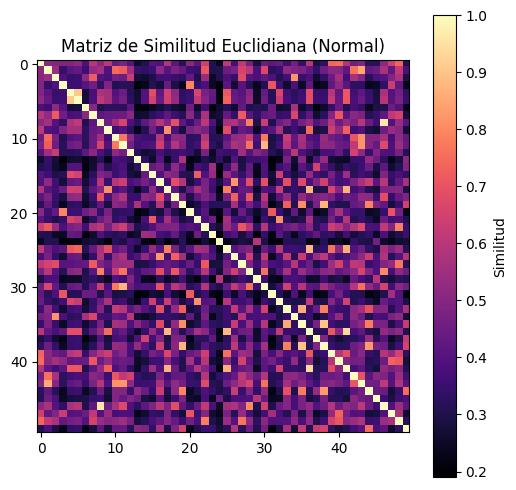

In [34]:
# Complete 4.3 Grafique la matriz de similitud
print('\n' + '='*50)
print('Calculando y graficando la Matriz de Similitud (Normal):')
Ma_similitud_normal = matriz_similitud(X_normal, distancia_euclidiana) # Usamos Euclidiana para el ejemplo

plt.figure(figsize=(6, 6))
plt.imshow(Ma_similitud_normal, cmap='magma')
plt.title('Matriz de Similitud Euclidiana (Normal)')
plt.colorbar(label='Similitud')
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

A partir de los gráficos obtenidos, puede afirmarse que el gráfico de similitud es más fácil de interpretar que los gráficos de disimilitud.

La matriz de similitud euclidiana presenta una estructura comparable a una matriz de correlación, donde los valores cercanos a 1 (representados por colores más claros) indican una alta similitud entre los puntos, mientras que valores más bajos indican menor relación. Esta codificación facilita la identificación visual de patrones, agrupamientos y relaciones entre observaciones, ya que la interpretación es directa: mayor valor implica mayor similitud.

En contraste, las matrices de disimilitud (tanto Euclidiana como Mahalanobis) muestran un mayor nivel de contraste y variabilidad, con rangos de valores menos intuitivos. Aunque la diagonal principal es claramente identificable (distancia cero), las diferencias entre colores fuera de ella resultan más difíciles de interpretar visualmente, especialmente cuando los valores de distancia son similares entre sí. Esto hace que la comparación entre pares de puntos requiera un análisis más detallado y menos inmediato.

# 🚀 ¡TALLER FINALIZADO!"